In [1]:
# until ttk is installed, add parent dir to path
import sys
sys.path.insert(0, '..')

In [2]:
# typicaL imports
import pandas as pd
import numpy as np
import re

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import matplotlib.pyplot as plt

import spacy
import ete3
import seaborn

from ttk.corpus import load_headline_corpus

In [4]:
%%time
# load the corpus
corpus = load_headline_corpus(verbose=True)

print ('Headlines:', len(corpus.sents()))

Loading corpus from: S:\git\tacticsiege\tactictoolkit\ttk\..\env\corpus\dated\2017_08_22\corpus
Corpus loaded.
Headlines: 190447
Wall time: 2.64 s


In [5]:
%%time
# load spaCy nlp object
nlp = spacy.load('en')

Wall time: 1.76 s


In [6]:
%%time
# for every category, get the raw data and create a spacy nlp object out of it
nlp_objs = {cat: nlp(corpus.raw(categories=[cat])) for cat in corpus.categories()}
print (len(nlp_objs.keys()))

26
Wall time: 1min 10s


## Create similarity heatmap

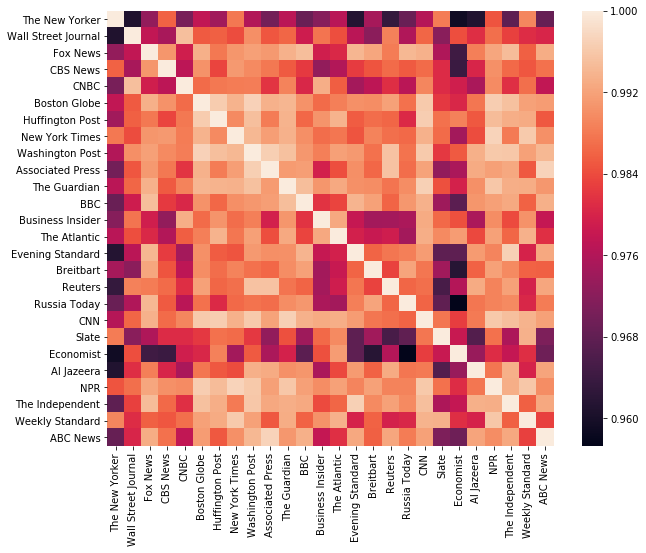

In [18]:
labels = corpus.categories()

similarities = [[doc.similarity(other) for other in nlp_objs.values()] for doc in nlp_objs.values()]
similaritiesDf = pd.DataFrame(similarities, columns=labels, index=labels)

seaborn.heatmap(similaritiesDf)

The New Yorker


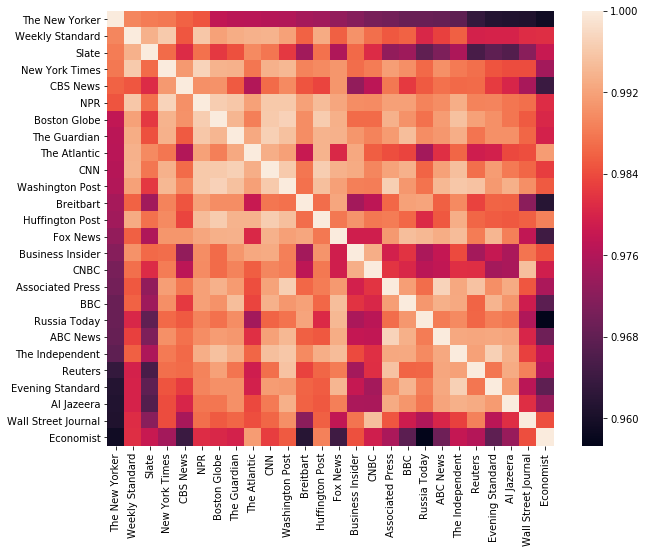

Wall Street Journal


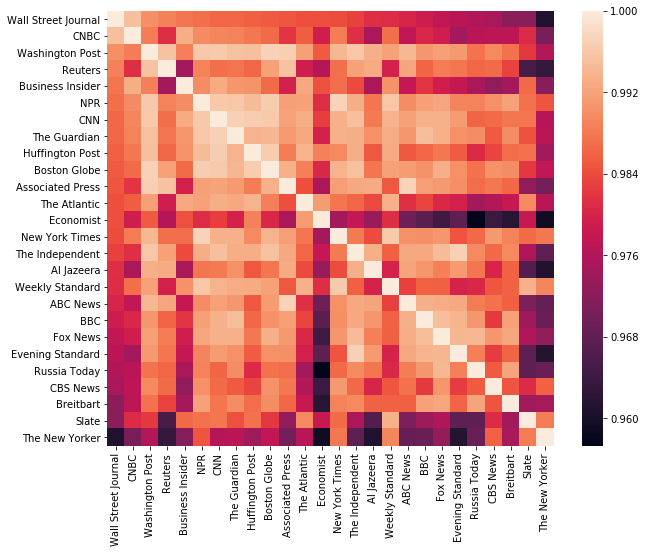

Fox News


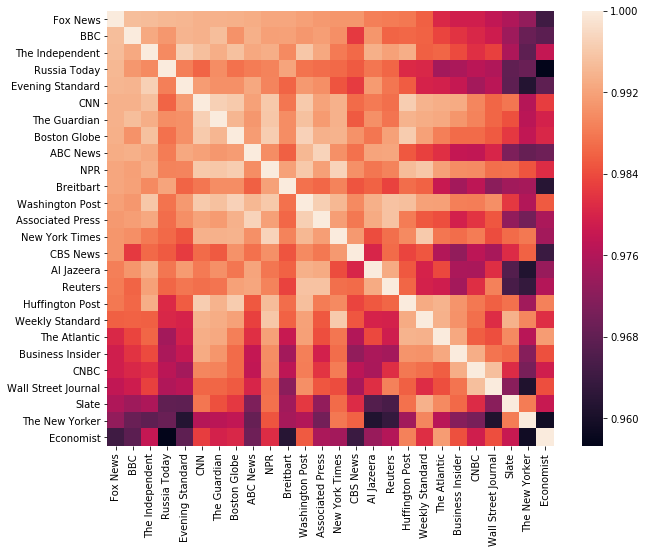

CBS News


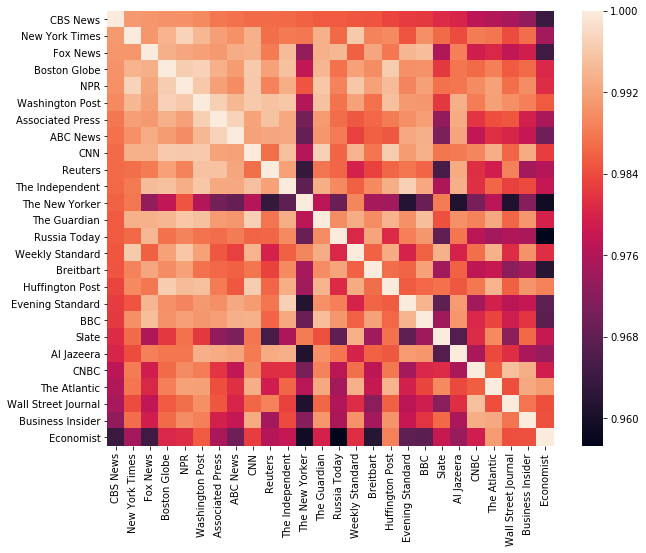

CNBC


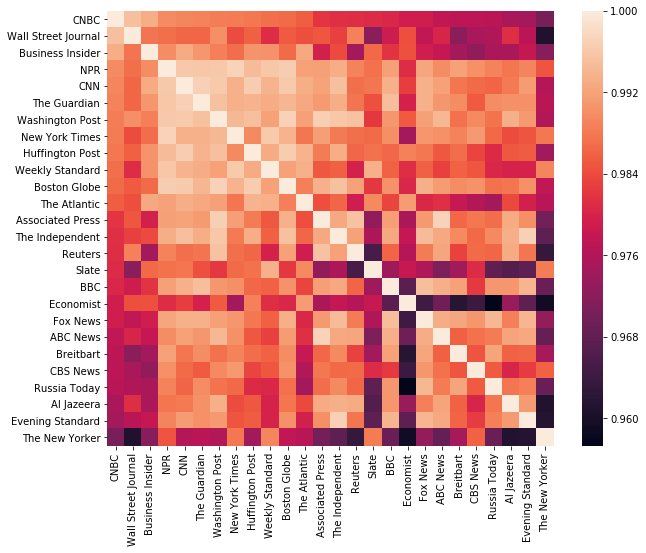

Boston Globe


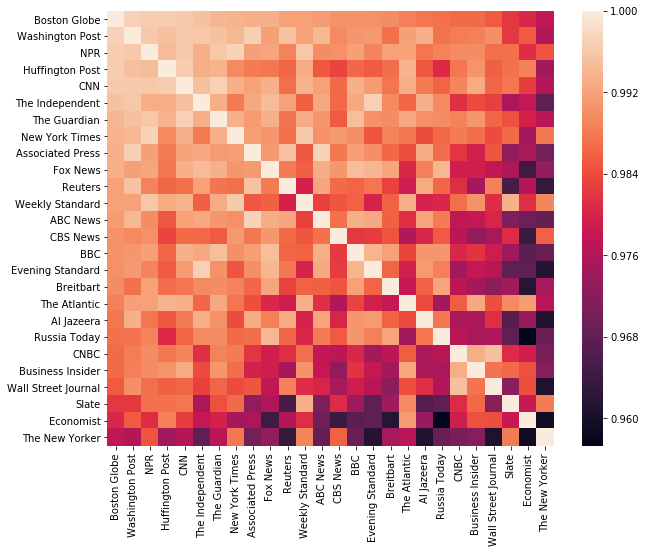

Huffington Post


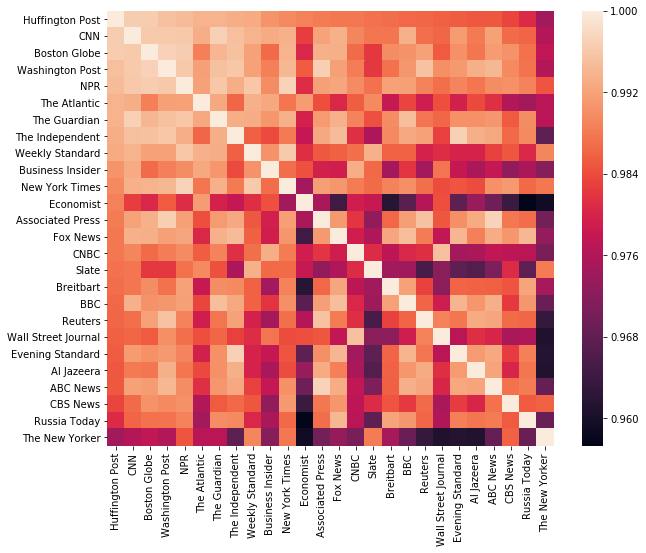

New York Times


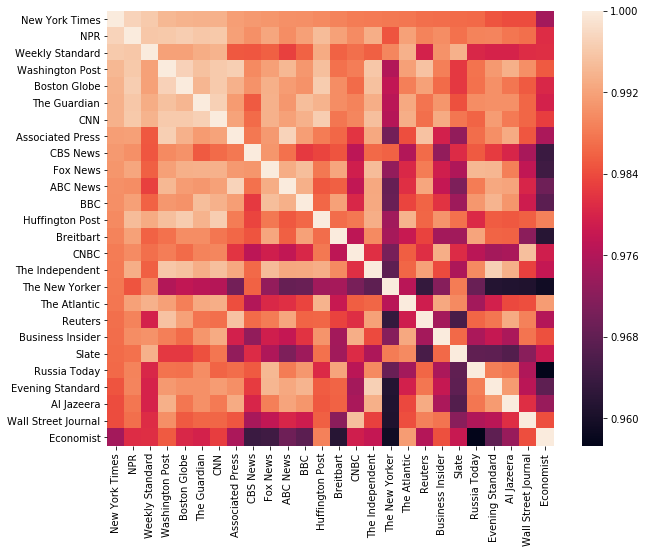

Washington Post


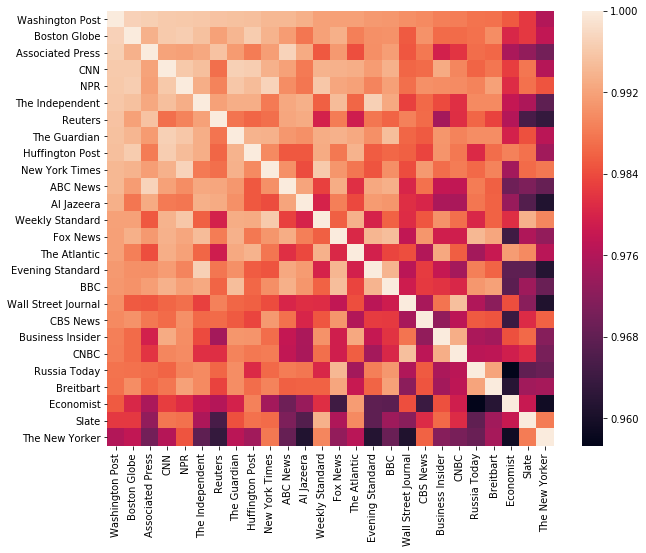

Associated Press


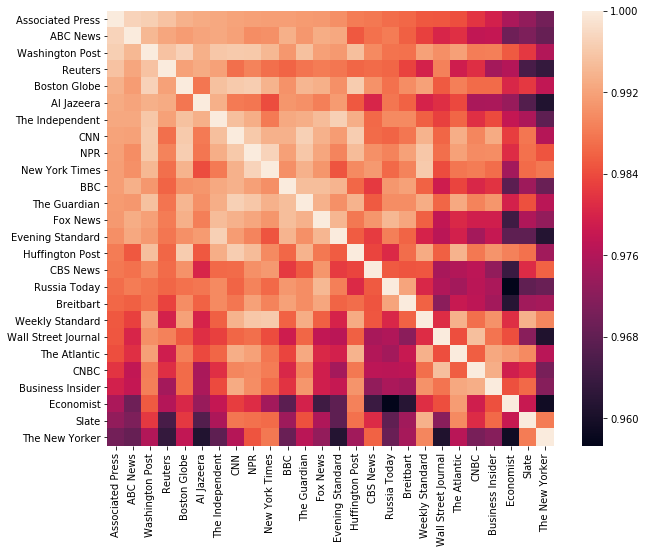

The Guardian


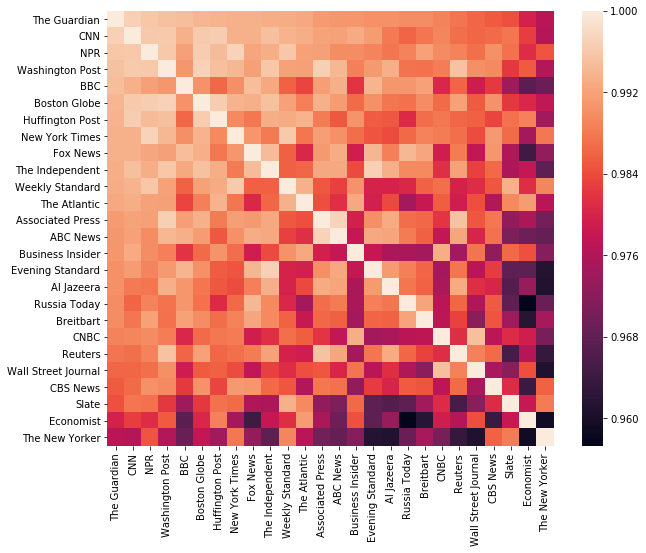

BBC


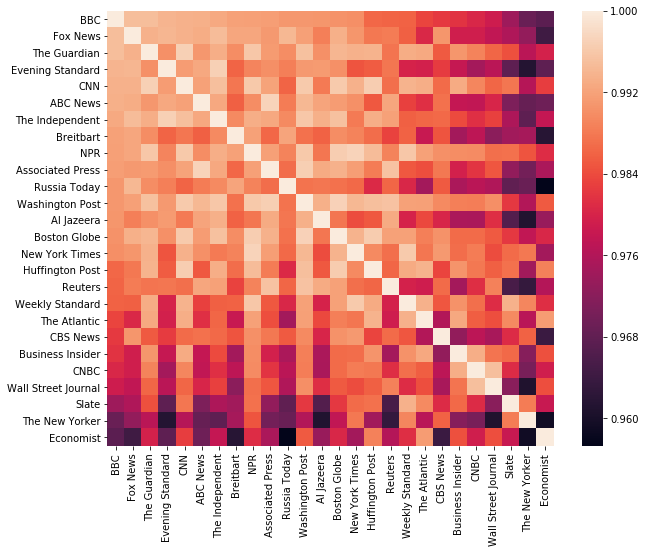

Business Insider


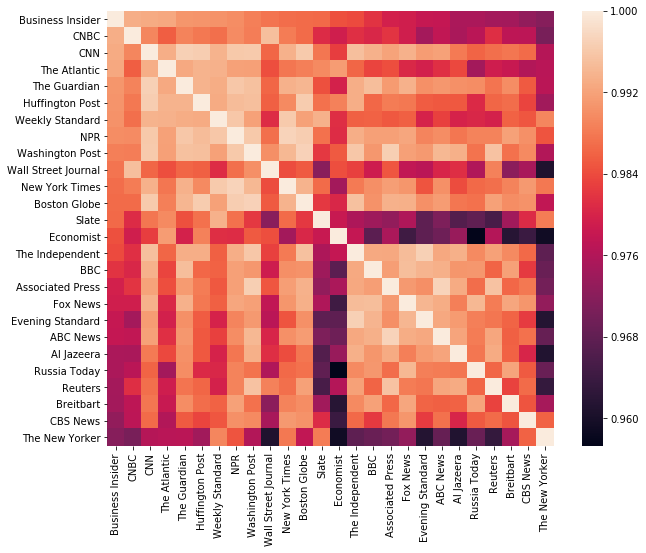

The Atlantic


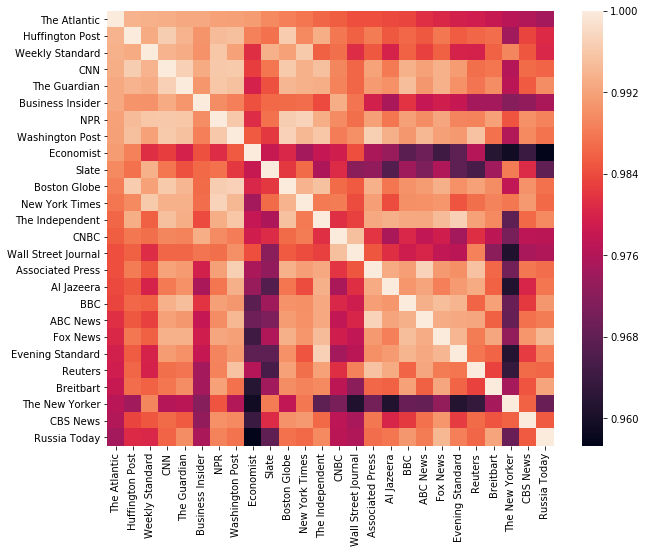

Evening Standard


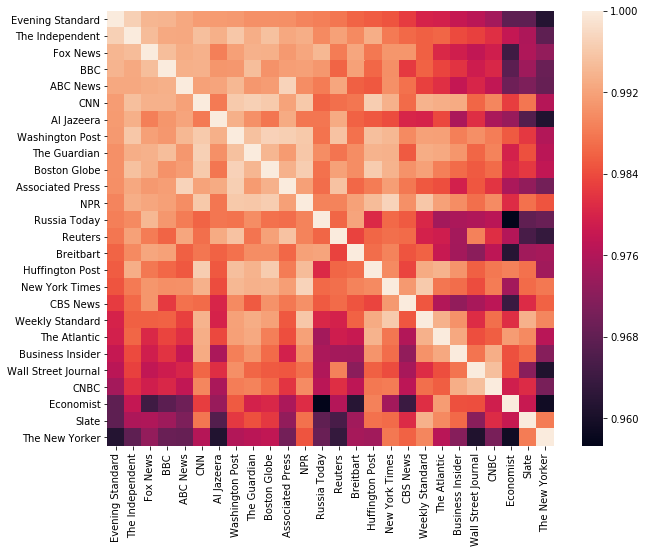

Breitbart


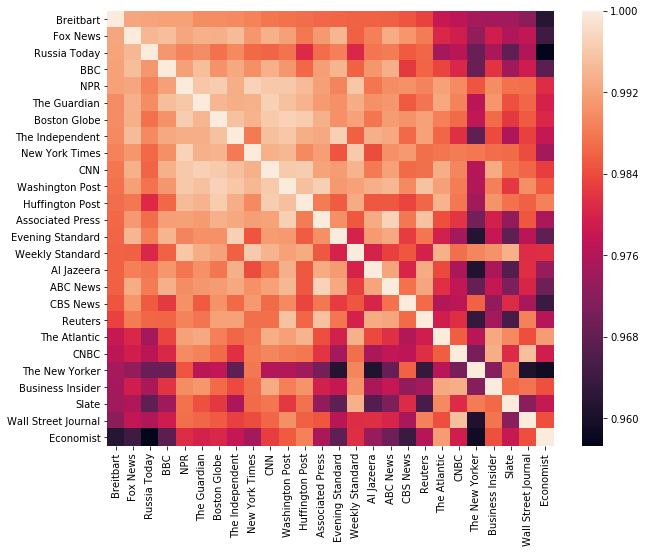

Reuters


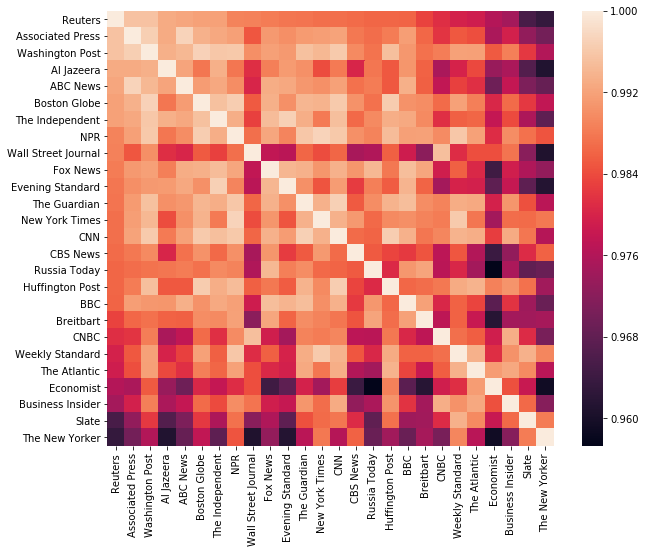

Russia Today


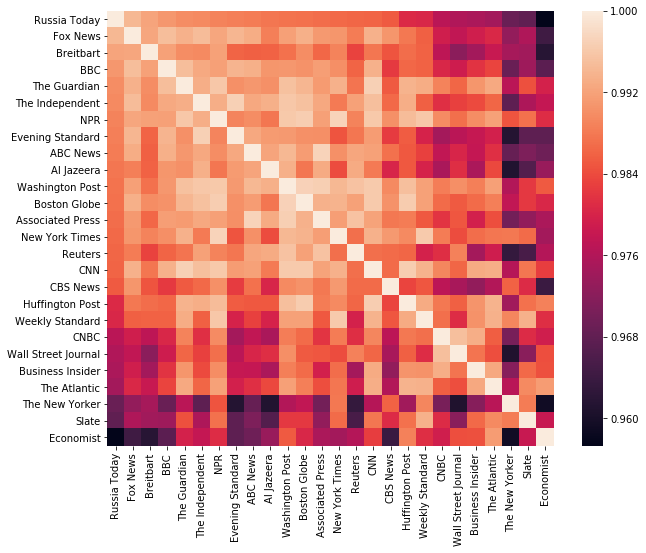

CNN


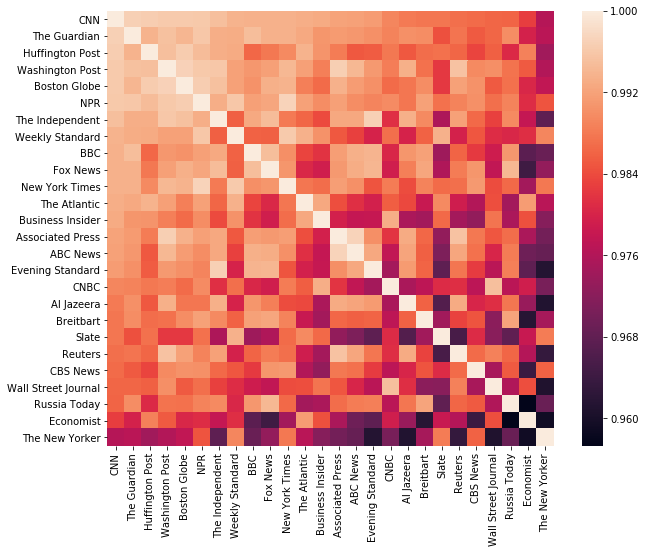

Slate


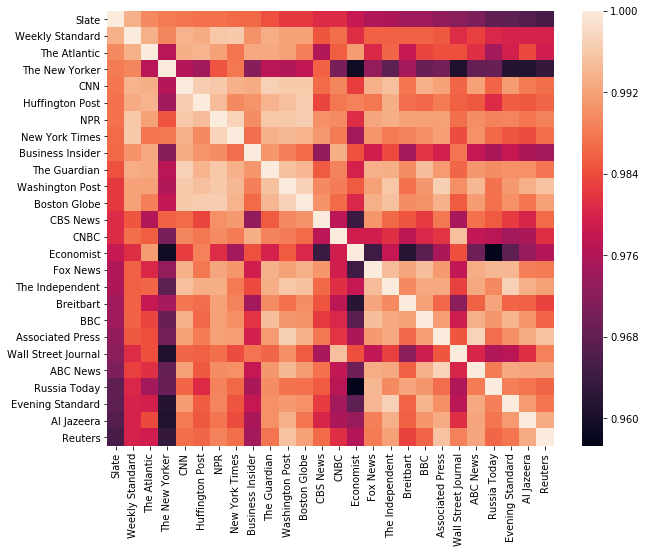

Economist


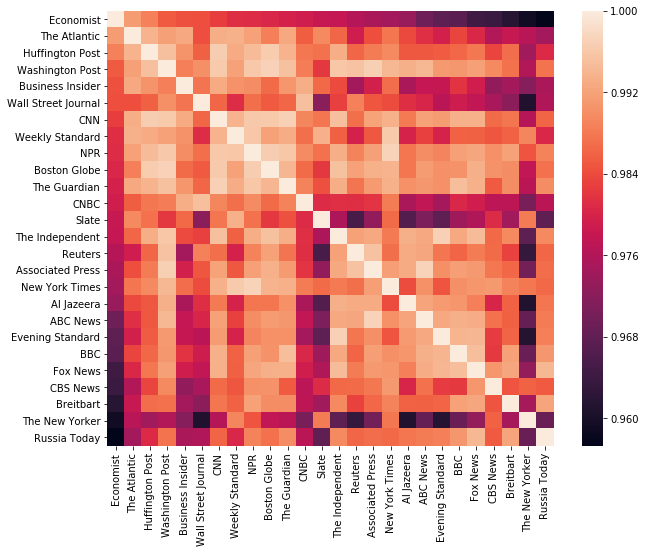

Al Jazeera


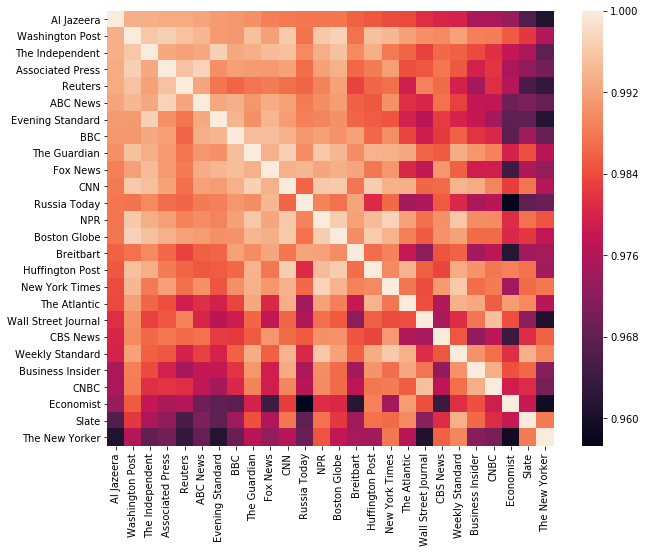

NPR


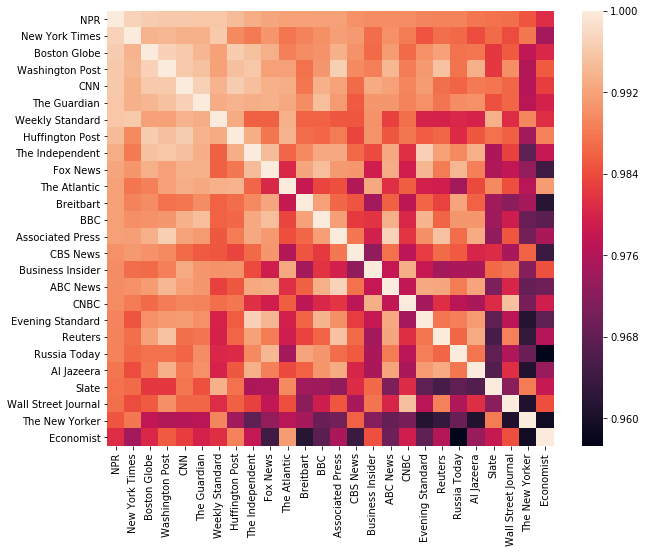

The Independent


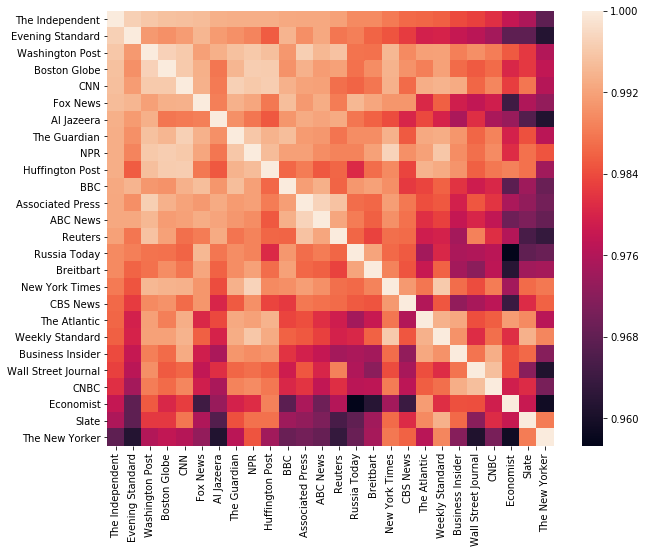

Weekly Standard


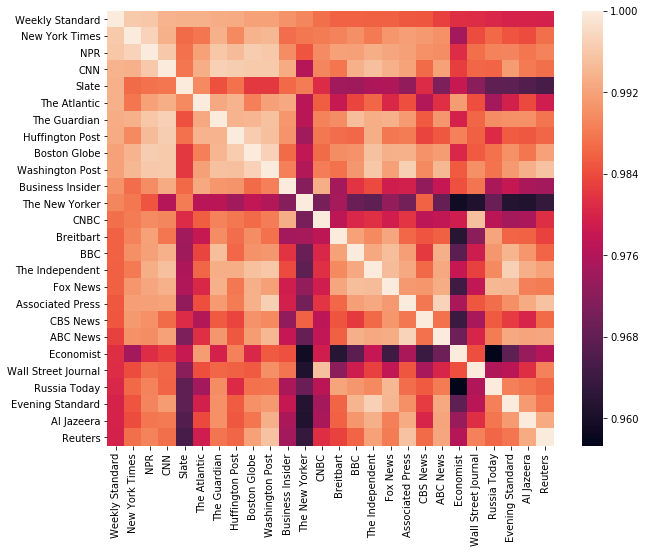

ABC News


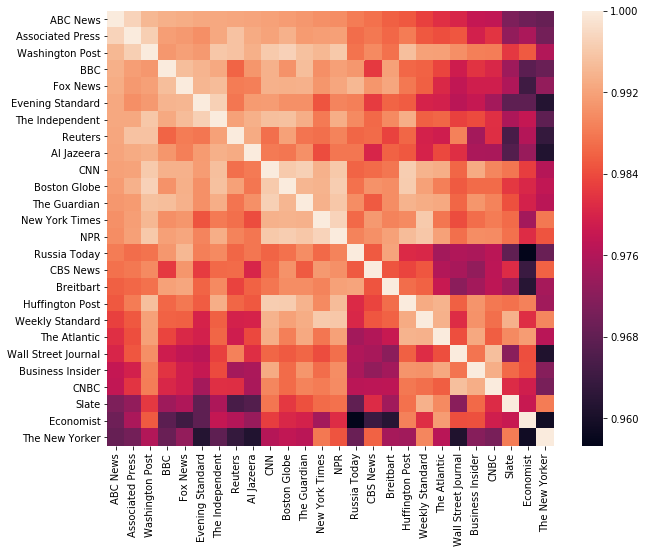

In [20]:
# sort all off of similarity to one, ABC News since it's first

for sortBy in corpus.categories():
    s = similaritiesDf.copy()
    print (sortBy)
    s = s.sort_values(by=sortBy, axis=0, ascending=False)
    s = s.sort_values(by=sortBy, axis=1, ascending=False)
    seaborn.heatmap(s)
    plt.show()

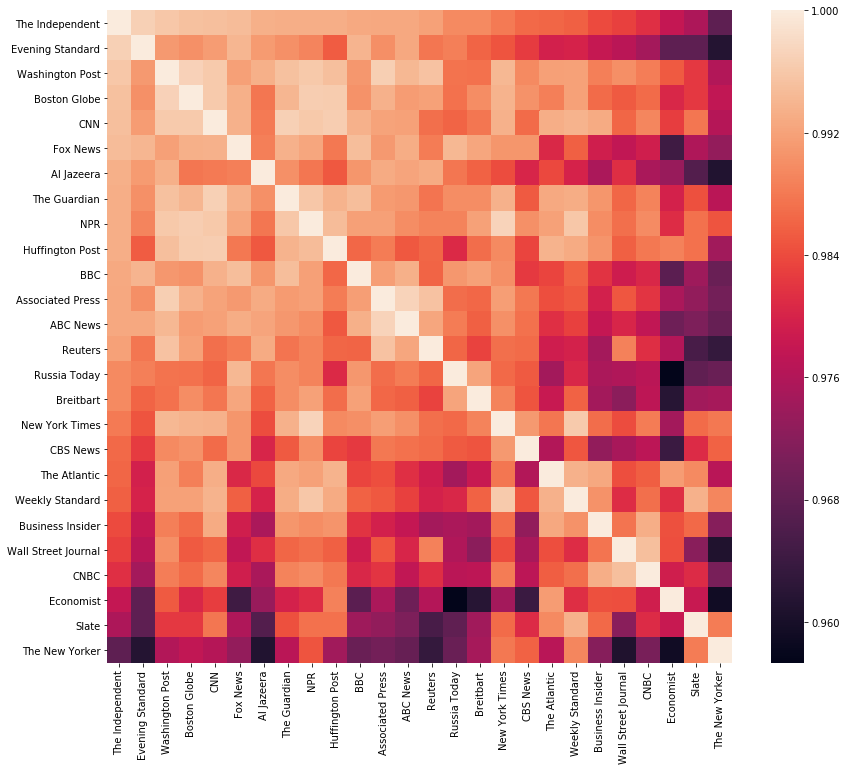

In [22]:
matplotlib.rcParams['figure.figsize'] = (14.0, 12.0)
s = similaritiesDf.copy()
s = s.sort_values(by='The Independent', axis=0, ascending=False)
s = s.sort_values(by='The Independent', axis=1, ascending=False)
seaborn.heatmap(s)
plt.show()

In [30]:
%%time
dates=[date for date in corpus.dates() if date < '2017-07-00']
date_nlps = {date: nlp(corpus.raw(dates=[date])) for date in corpus.dates(dates=dates)}
print ('Dates:', len(date_nlps.keys()))

Dates: 35
Wall time: 30.4 s


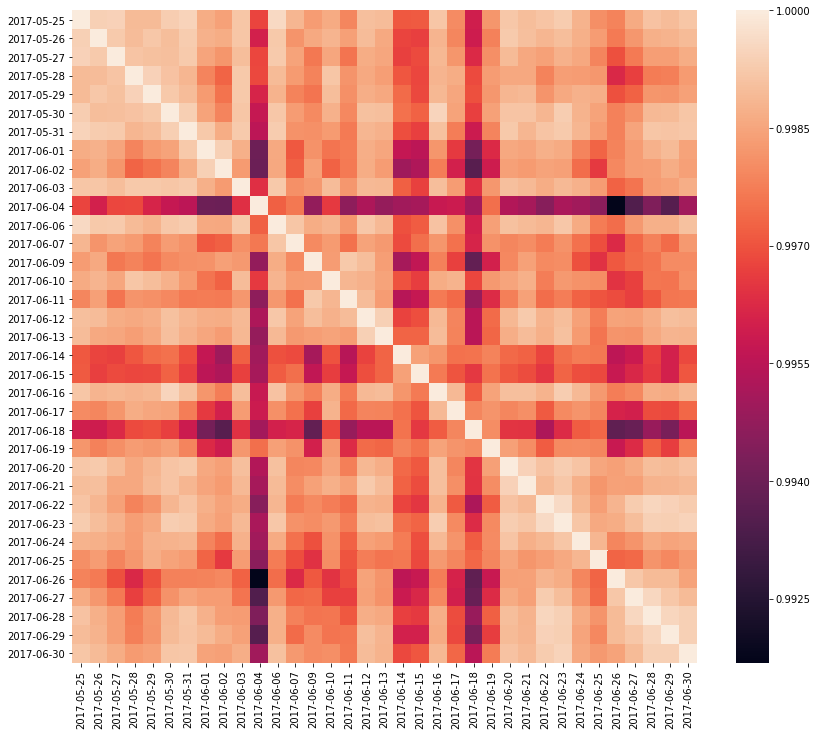

In [31]:
date_sims = [[doc.similarity(other) for other in date_nlps.values()] for doc in date_nlps.values()]
date_sims_df = pd.DataFrame(date_sims, columns=dates, index=dates)
seaborn.heatmap(date_sims_df)

In [ ]:
# 06-04 =london attacks, 15/16th london fire, virginia shooting, session testifiesm 